# Doctor Consultation Fee Analysis

# Introduction

# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_excel("Final_Train.xlsx")
df_test=pd.read_excel("Final_Test.xlsx")


In [3]:
df_train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [4]:
df_test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [5]:
df_train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [6]:
df_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [7]:
df_train.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [8]:
df_test.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [9]:
#Lets chcek the value counts of object type columns in train datadet
for col in df_train.columns:
    if df_train[col].dtype=="object":
        print(df_train[col].value_counts())
        print()

BDS                                                                                                                                         488
BHMS                                                                                                                                        477
BAMS                                                                                                                                        471
MBBS                                                                                                                                        334
MBBS, MS - ENT                                                                                                                              220
                                                                                                                                           ... 
DNB - ENT, Diploma in Otorhinolaryngology (DLO), MBBS                                                                                   

In [10]:
#Lets chcek the value counts of object type columns in test dataset
for col in df_test.columns:
    if df_test[col].dtype=="object":
        print(df_test[col].value_counts())
        print()

BAMS                                                                          153
BHMS                                                                          150
BDS                                                                           144
MBBS                                                                          107
MBBS, MD - Dermatology                                                         64
                                                                             ... 
BDS, MDS - Prosthodontist And Crown Bridge, Fellowship in Oral implantlogy      1
FWFO, FPFA                                                                      1
DPM (Psychiatry), MBBS                                                          1
MBBS, Diploma in Anesthesiology, Certificate in Acupuncture                     1
BDS, MDS - Orthodontics, Certificate of Oral Implantology                       1
Name: Qualification, Length: 630, dtype: int64

10 years experience    110
8 years experience     




Observations: We can see that all the columns except fees nees to be preprocessed by spliiting , filling nan values etc..now 
              we will fill these null values and do necessary changes in columns one by one.
              

In [11]:
#fisrt we need to strip of " years experience"
df_train["Experience"]=df_train["Experience"].str.strip(" years experience")
df_test["Experience"]=df_test["Experience"].str.strip(" years experience")

In [12]:
#Now we need to convert the Experience column to int
df_train["Experience"]=df_train["Experience"].astype(int)
df_test["Experience"]=df_test["Experience"].astype(int)

In [13]:
# lets check Experience columns 
print(df_train['Experience'])
print('\n')
print(df_test['Experience'])

0       24
1       12
2        9
3       12
4       20
        ..
5956    19
5957    33
5958    41
5959    15
5960    17
Name: Experience, Length: 5961, dtype: int32


0       35
1       31
2       40
3        0
4       16
        ..
1982    10
1983     4
1984     9
1985    12
1986     8
Name: Experience, Length: 1987, dtype: int32


In [14]:
#Lets strip the"%" of Rating and converting into float
df_train["Rating"]=df_train["Rating"].str.strip("%").astype(float)
df_test["Rating"]=df_test["Rating"].str.strip("%").astype(float)

In [15]:
#Lets replace the null values in rating with 0 which is a new rating value as we cant impute it with existing one.
df_train["Rating"].fillna(0,inplace=True)
df_test["Rating"].fillna(0,inplace=True)

In [16]:
#Lets chcek the value counts
df_train["Place"].value_counts()

HSR Layout, Bangalore       75
Andheri West, Mumbai        70
Dwarka, Delhi               67
Banjara Hills, Hyderabad    64
Mulund West, Mumbai         54
                            ..
Kovaipudur, Coimbatore       1
Model Town 1, Delhi          1
Mulanthuruthy, Ernakulam     1
Paradise, Hyderabad          1
Bolarum, Hyderabad           1
Name: Place, Length: 877, dtype: int64

In [17]:
df_test["Place"].value_counts()

Andheri West, Mumbai             27
Mulund West, Mumbai              27
Dwarka, Delhi                    26
Whitefield, Bangalore            23
HSR Layout, Bangalore            22
                                 ..
Neredmet, Hyderabad               1
Goregaon, Mumbai                  1
Nallagandla, Hyderabad            1
Vanchiyur, Thiruvananthapuram     1
JP Nagar 5 Phase, Bangalore       1
Name: Place, Length: 592, dtype: int64

In [18]:
#Lets chcek the rows where null values are there
df_train.loc[df_train["Place"].isnull()]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
91,Get inspired by remarkable stories of people l...,0,0.0,NaN,Dermatologists,NaN,100
502,Get inspired by remarkable stories of people l...,0,0.0,NaN,Dermatologists,NaN,100
599,Get inspired by remarkable stories of people l...,0,0.0,NaN,Dermatologists,NaN,100
605,Get inspired by remarkable stories of people l...,0,0.0,NaN,Dermatologists,NaN,100
724,Get inspired by remarkable stories of people l...,0,0.0,NaN,Dermatologists,NaN,100
1002,Get inspired by remarkable stories of people l...,0,0.0,NaN,Dermatologists,NaN,100
1083,Get inspired by remarkable stories of people l...,0,0.0,NaN,Dermatologists,NaN,100
1210,Get inspired by remarkable stories of people l...,0,0.0,NaN,Dermatologists,NaN,100
2078,Get inspired by remarkable stories of people l...,0,0.0,NaN,Dermatologists,NaN,100
2178,Get inspired by remarkable stories of people l...,0,0.0,NaN,Dermatologists,NaN,100


In [19]:
#Lets chcek the rows where null values are there
df_test.loc[df_test["Place"].isnull()]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
381,Get inspired by remarkable stories of people l...,0,0.0,NaN,Dermatologists,NaN
1494,Get inspired by remarkable stories of people l...,0,0.0,NaN,Dermatologists,NaN
1644,Get inspired by remarkable stories of people l...,0,0.0,NaN,Dermatologists,NaN
1838,Get inspired by remarkable stories of people l...,0,0.0,NaN,Dermatologists,NaN
1925,Get inspired by remarkable stories of people l...,0,0.0,NaN,Dermatologists,NaN
1930,Get inspired by remarkable stories of people l...,0,0.0,NaN,Dermatologists,NaN


In [20]:
# filling nan values
df_train['Place'].fillna('None,None',inplace=True)
df_test['Place'].fillna('None,None',inplace=True)

In [21]:
# Splitting the place column into two columns
df_train['City'] = df_train['Place'].str.split(', ').str[-1]
df_train['Area'] = df_train['Place'].str.split(', ').str[0]

df_test['City'] = df_test['Place'].str.split(', ').str[-1]
df_test['Area'] = df_test['Place'].str.split(', ').str[0]

In [22]:
# checking for null values if any in two new columns
df_train['Area'].isnull().sum(),df_test['Area'].isnull().sum(),df_train['City'].isnull().sum(),df_test['City'].isnull().sum()

(0, 0, 0, 0)

In [23]:
# dropping the place column:
df_train.drop('Place',axis=1,inplace=True)
df_test.drop('Place',axis=1,inplace=True)

Qualification Column

In [24]:
def changequali(x):
    bans=x.split(' ')
    sans=x.split(',')
    if ',' not in x:
        return bans[0]
    else:
        return sans[0]

In [25]:
df_train['Qualification']=df_train['Qualification'].apply(changequali)
df_test['Qualification']=df_test['Qualification'].apply(changequali)

In [26]:
df_train

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,City,Area
0,BHMS,24,100.0,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad
1,BAMS,12,98.0,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield
2,MBBS,9,0.0,ENT Specialist,NaN,300,Bangalore,Mathikere - BEL
3,BSc - Zoology,12,0.0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road
4,BAMS,20,100.0,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai
...,...,...,...,...,...,...,...,...
5956,MBBS,19,98.0,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Bangalore,Basavanagudi
5957,MBBS,33,0.0,General Medicine,NaN,100,Chennai,Nungambakkam
5958,MBBS,41,97.0,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Delhi,Greater Kailash Part 2
5959,MBBS,15,90.0,General Medicine,General Medical Consultation Viral Fever Treat...,100,Mumbai,Vileparle West


In [27]:
def removeminus(x):
    cabs=x.split('-')
    if '-' in x:
        return cabs[0]
    else:
        return x

In [28]:
df_train['Qualification']=df_train['Qualification'].apply(removeminus)
df_test['Qualification']=df_test['Qualification'].apply(removeminus)

In [29]:
df_train

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,City,Area
0,BHMS,24,100.0,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad
1,BAMS,12,98.0,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield
2,MBBS,9,0.0,ENT Specialist,NaN,300,Bangalore,Mathikere - BEL
3,BSc,12,0.0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road
4,BAMS,20,100.0,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai
...,...,...,...,...,...,...,...,...
5956,MBBS,19,98.0,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Bangalore,Basavanagudi
5957,MBBS,33,0.0,General Medicine,NaN,100,Chennai,Nungambakkam
5958,MBBS,41,97.0,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Delhi,Greater Kailash Part 2
5959,MBBS,15,90.0,General Medicine,General Medical Consultation Viral Fever Treat...,100,Mumbai,Vileparle West


In [30]:
df_train['Qualification'].value_counts()

MBBS                                                        2448
BDS                                                         1208
BAMS                                                         711
BHMS                                                         706
MD                                                           264
                                                            ... 
Masters Diploma in Acupressure                                 1
FRGUHS                                                         1
MSc                                                            1
Certificate in Dental Implants                                 1
Fellowship and Diplomate in Implantology from ICOI (USA)       1
Name: Qualification, Length: 102, dtype: int64

In [31]:
df_test['Qualification'].value_counts()

MBBS                                                                   865
BDS                                                                    371
BHMS                                                                   232
BAMS                                                                   228
MD                                                                      74
MDS                                                                     48
MS                                                                      31
MD                                                                      18
MDS                                                                     13
DDVL                                                                    13
DNB                                                                     13
DHMS (Diploma in Homeopathic Medicine and Surgery)                       7
B.Sc                                                                     6
Diploma in Otorhinolaryng

In [32]:
def stillqua(x):
    dab=x.strip('.')
    tab= dab.lower()
    mylist=['bsc','diploma','certifi','doctor']
    if mylist[0] in tab:
        return 'BSC'
    elif mylist[1] in tab:
        return 'Diploma'
    elif mylist[2] in tab:
        return 'Certification'
    elif mylist[3] in tab:
        return 'PhD'
    else:
        return x

In [33]:
df_train['Qualification']=df_train['Qualification'].apply(stillqua)
df_test['Qualification']=df_test['Qualification'].apply(stillqua)

In [34]:
df_train['Qualification'].value_counts()

MBBS                         2448
BDS                          1208
BAMS                          711
BHMS                          706
MD                            264
                             ... 
DGO                             1
Cochlear Implant Surgery        1
MBA                             1
M.Ch                            1
Fellowship in Diabetology       1
Name: Qualification, Length: 73, dtype: int64

In [35]:
df_test['Qualification'].value_counts()

MBBS                                         865
BDS                                          371
BHMS                                         232
BAMS                                         228
MD                                            74
MDS                                           48
MS                                            31
Diploma                                       23
MD                                            18
MDS                                           13
DDVL                                          13
DNB                                           13
B.Sc                                           6
Get                                            6
BSC                                            5
MS                                             5
LCEH                                           5
DHMS                                           4
Certification                                  3
DM                                             2
BSAM                

Miscellaneous_Info Info Column

In [36]:
#Comparing the values in two columns
pd.set_option('display.max_colwidth', -1)
df_train[['Rating','Miscellaneous_Info']].head(100)

,Rating,Miscellaneous_Info
0,100.0,"100% 16 Feedback Kakkanad, Ernakulam"
1,98.0,"98% 76 Feedback Whitefield, Bangalore"
2,0.0,NaN
3,0.0,"Bannerghatta Road, Bangalore ₹250 Available on Sun, 10 Feb"
4,100.0,"100% 4 Feedback Keelkattalai, Chennai"
...,...,...
95,100.0,Pediaterics Skin Disorder Kidney Stone Treatment
96,97.0,General dermatology Botox Injections Skin Boosters and Fillers
97,0.0,NaN
98,0.0,NaN


In [37]:
pd.set_option('display.max_colwidth', -1)
df_test[['Rating','Miscellaneous_Info']].head(100)

,Rating,Miscellaneous_Info
0,0.0,NaN
1,0.0,NaN
2,70.0,"70% 4 Feedback KK Nagar, Chennai"
3,0.0,NaN
4,100.0,General Dentistry Conservative Dentistry Cosmetic/ Aesthetic Dentistry
...,...,...
95,100.0,"100% 1 Feedback Ernakulam, Ernakulam"
96,96.0,"96% 59 Feedback Frazer Town, Bangalore"
97,0.0,Homeopathy Acne / Pimples Treatment Hair Loss Treatment
98,0.0,NaN


Observation: I seems like rating column is derived from Miscellaneous Info Column So we are dropping this column.

In [38]:
df_train.drop('Miscellaneous_Info',axis=1,inplace=True)
df_test.drop('Miscellaneous_Info',axis=1,inplace=True)

In [39]:
# Checking for null values again in the datasets
df_train.isnull().sum(),df_test.isnull().sum()

(Qualification    0
 Experience       0
 Rating           0
 Profile          0
 Fees             0
 City             0
 Area             0
 dtype: int64,
 Qualification    0
 Experience       0
 Rating           0
 Profile          0
 City             0
 Area             0
 dtype: int64)

In [40]:
df_train.describe()

,Experience,Rating,Fees
count,5961.000000,5961.000000,5961.000000
mean,17.303976,42.217245,307.944640
std,11.142798,47.340934,190.920373
min,0.000000,0.000000,5.000000
25%,9.000000,0.000000,150.000000
50%,14.000000,0.000000,300.000000
75%,23.000000,96.000000,500.000000
max,66.000000,100.000000,950.000000


Observation:We can clearly see that minimum fees is rs 5 where as max is rs 950 and average fees is 307.944

# Data Vizualization

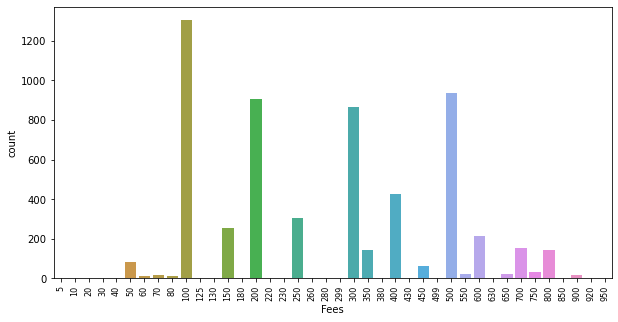

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(x='Fees',data=df_train)
plt.xticks(fontsize = 8,rotation=90)
plt.show()

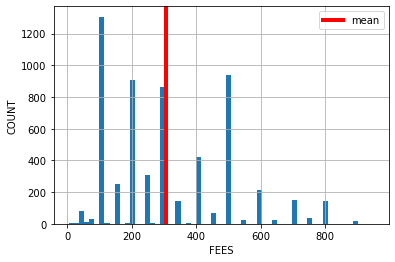

In [42]:
# checking mean for fees
fees=df_train['Fees'].hist(bins=60)
mean=np.mean(df_train['Fees'])
plt.axvline(mean,linewidth=4,color='red',label='mean')
plt.xlabel('FEES')
plt.ylabel('COUNT')
plt.legend()
plt.show()

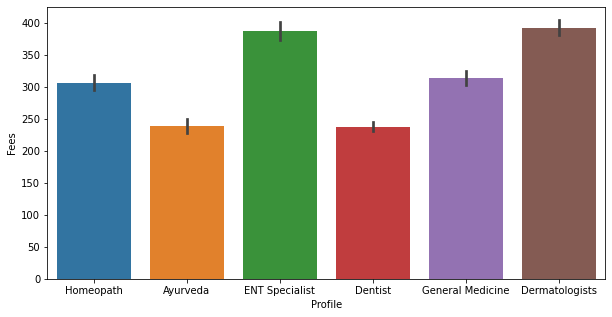

In [43]:

plt.figure(figsize=(10,5))
sns.barplot(x="Profile",y="Fees",data=df_train)
plt.show()

Observation: Ayurveda charges low while ENT and Dermatologist have highest charges

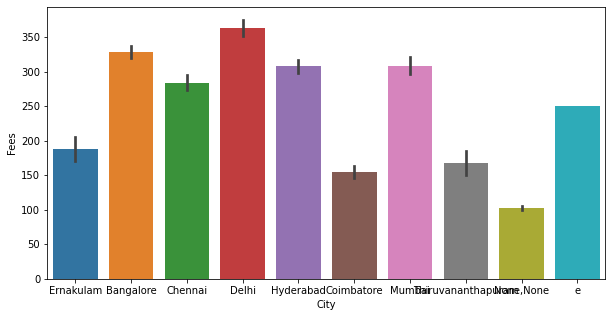

In [44]:
#lets check the averge rate of doctors in a city
plt.figure(figsize=(10,5))
sns.barplot(x="City",y="Fees",data=df_train)
plt.show()

observation:In delhi averge fees is maximum compared to other cities

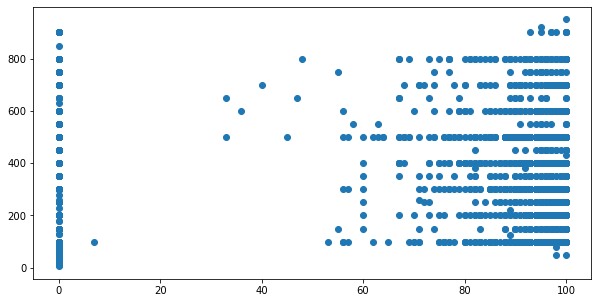

In [45]:
plt.figure(figsize=(10,5))
plt.scatter(df_train['Rating'],df_train['Fees'])
plt.show()

# EDA on Train Dataset

In [46]:
# Checking for datatypes again in the datasets
df_train.dtypes

Qualification    object 
Experience       int32  
Rating           float64
Profile          object 
Fees             int64  
City             object 
Area             object 
dtype: object

In [47]:
# converting Categorical columns into numeric
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Qualification','Profile','City','Area']
for val in list1:
    df_train[val]=le.fit_transform(df_train[val].astype(str))

In [48]:
df_train.corr()

,Qualification,Experience,Rating,Profile,Fees,City,Area
Qualification,1.000000,0.228142,-0.009361,0.346272,0.249409,-0.030825,0.001258
Experience,0.228142,1.000000,-0.038569,0.202073,0.002117,0.019397,0.008540
Rating,-0.009361,-0.038569,1.000000,-0.126389,0.153273,-0.103637,-0.041175
Profile,0.346272,0.202073,-0.126389,1.000000,0.145226,-0.016824,0.018170
Fees,0.249409,0.002117,0.153273,0.145226,1.000000,-0.038232,-0.058259
City,-0.030825,0.019397,-0.103637,-0.016824,-0.038232,1.000000,-0.081507
Area,0.001258,0.008540,-0.041175,0.018170,-0.058259,-0.081507,1.000000


Here we can see the correlation between the columns. For better understanding lets vizualize it through heatmap correlation

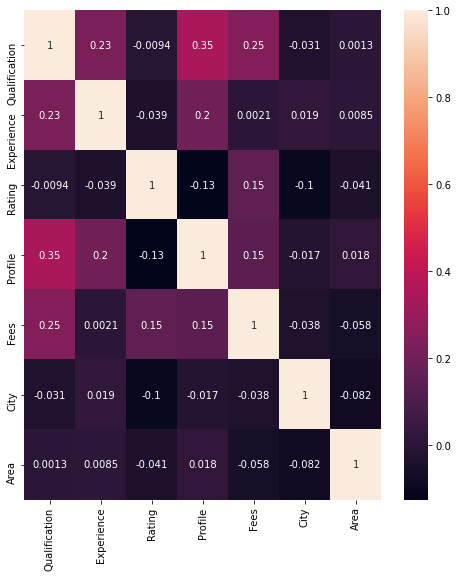

In [49]:
# heatmap
import seaborn as sns
corr_hmap=df_train.corr()
plt.figure(figsize=(8,9))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Lets plot graph for correlation now

Text(0.5, 1.0, 'Correlation with Target Variable')

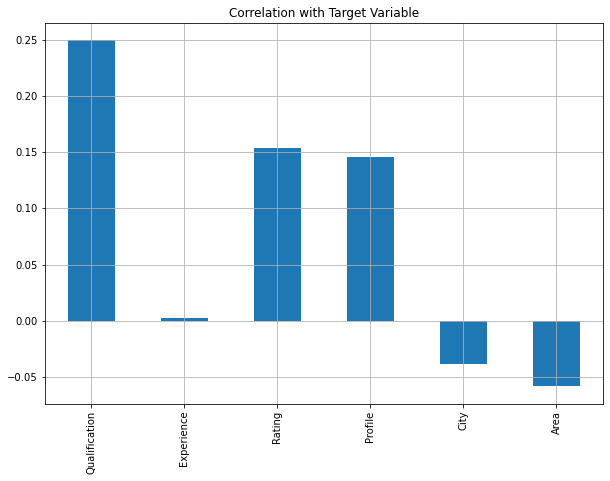

In [50]:
plt.figure(figsize=(10,7))
df_train.drop('Fees',axis=1).corrwith(df_train['Fees']).plot(kind='bar',grid=True)
plt.xticks(rotation=90)
plt.title('Correlation with Target Variable')

Observation: qualification is highly correlated with 0.25 percent where as area is negatively correlated with -0.05 percent

Qualification    AxesSubplot(0.125,0.536818;0.168478x0.343182)   
Experience       AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Rating           AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Profile          AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Fees             AxesSubplot(0.125,0.125;0.168478x0.343182)      
City             AxesSubplot(0.327174,0.125;0.168478x0.343182)   
Area             AxesSubplot(0.529348,0.125;0.168478x0.343182)   
dtype: object

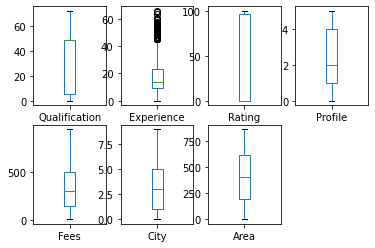

In [51]:
# Checking Outliers
df_train.plot.box(subplots=True,layout=(2,4))

In [52]:
# removing outliers

from scipy.stats import zscore

z=np.abs(zscore(df_train))
print(df_train.shape)
df_train=df_train.loc[(z<3).all(axis=1)]
print(df_train.shape)

(5961, 7)
(5903, 7)


# Spliting the data

In [53]:
#splitting the data for training and test

df_x=df_train.drop(columns=['Fees'])
y=df_train['Fees']

In [54]:
df_x.skew()

Qualification   -0.094067
Experience       0.897661
Rating           0.240969
Profile          0.121336
City             0.045634
Area             0.112377
dtype: float64

In [55]:
# treating skewness using log

for col in df_x.columns:
    if df_x.skew().loc[col]>0.55:
        df_x[col]=np.sqrt(df_x[col])

In [56]:
df_x.skew()

Qualification   -0.094067
Experience       0.023642
Rating           0.240969
Profile          0.121336
City             0.045634
Area             0.112377
dtype: float64

In [57]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(df_x)

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

# Sending the data to Models

In [59]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [60]:
model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor()]

for m in model:
    m.fit(x_train,y_train)
    print("Score of ",m," is",m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("Error:")
    print("Mean Absolute Error:",mean_absolute_error(y_test,predm))
    print("Mean Squared Error:",mean_squared_error(y_test,predm))
    print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predm)))
    print("R2 Score:",r2_score(y_test,predm))
    print("**************************************************************************************************")
    print('\n')

Score of  LinearRegression()  is 0.09900987723453869
Error:
Mean Absolute Error: 147.65245730388813
Mean Squared Error: 32685.92723619649
Root Mean Squared Error: 180.79249773205882
R2 Score: 0.09565900699085017
**************************************************************************************************


Score of  Lasso()  is 0.0988303180720903
Error:
Mean Absolute Error: 147.8125321303414
Mean Squared Error: 32701.67379399039
Root Mean Squared Error: 180.83604119198802
R2 Score: 0.09522333760907287
**************************************************************************************************


Score of  Ridge()  is 0.09900987333612565
Error:
Mean Absolute Error: 147.65340875316406
Mean Squared Error: 32685.96018547069
Root Mean Squared Error: 180.79258885659746
R2 Score: 0.09565809536368008
**************************************************************************************************


Score of  ElasticNet()  is 0.08877495369302701
Error:
Mean Absolute Error: 149.546263

# Using some ensemble techniques to boost accuracy

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [62]:
model=[RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:
    m.fit(x_train,y_train)
    print("Score of ",m," is",m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("Error:")
    print("Mean Absolute Error:",mean_absolute_error(y_test,predm))
    print("Mean Squared Error:",mean_squared_error(y_test,predm))
    print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predm)))
    print("R2 Score:",r2_score(y_test,predm))
    print("**************************************************************************************************")
    print('\n')

Score of  RandomForestRegressor()  is 0.8797541011978943
Error:
Mean Absolute Error: 132.54160494200502
Mean Squared Error: 30231.81564563745
Root Mean Squared Error: 173.87298710736366
R2 Score: 0.16355837226581504
**************************************************************************************************


Score of  AdaBoostRegressor()  is 0.12711929894638163
Error:
Mean Absolute Error: 148.9392713210847
Mean Squared Error: 32290.397176894916
Root Mean Squared Error: 179.6952898016387
R2 Score: 0.10660237243399551
**************************************************************************************************


Score of  GradientBoostingRegressor()  is 0.2665410915149542
Error:
Mean Absolute Error: 134.4303386147056
Mean Squared Error: 28991.087793262745
Root Mean Squared Error: 170.26769450856713
R2 Score: 0.1978863278401669
**************************************************************************************************




# Using GridsearchCV

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
gbr=GradientBoostingRegressor()
estimator={'n_estimators':[100,150,200]}
clf=GridSearchCV(gbr,estimator)
clf.fit(x,y)
clf.best_params_

{'n_estimators': 200}

# Best Model

In [65]:
# random forest has more better result than knr model
rfr=GradientBoostingRegressor(n_estimators=200)
rfr.fit(x_train,y_train)
print("Score is ",rfr.score(x_train,y_train))
predrfr=rfr.predict(x_test)
print('\n')
print("Mean Absolute Error:",mean_absolute_error(y_test,predrfr))
print("Mean Squared Error:",mean_squared_error(y_test,predrfr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predrfr)))
print("R2 Score:",r2_score(y_test,predrfr))

Score is  0.32001643148561354


Mean Absolute Error: 132.45500327838917
Mean Squared Error: 28531.838088563447
Root Mean Squared Error: 168.91370012098915
R2 Score: 0.21059266261799747


# Cross Validation

In [66]:
# cross validation
from sklearn.model_selection import cross_val_score

rfrscores=cross_val_score(rfr,x,y,cv=5)
print(rfrscores)
print(rfrscores.mean(),rfrscores.std())

[0.19247782 0.20343895 0.25206694 0.19850309 0.23112819]
0.21552299792374 0.022564411046529415


# Saving the Model

In [67]:
import joblib
joblib.dump(rfr,'doc-fees.obj') 

['doc-fees.obj']

# EDA on Test Dataset

In [68]:
df_test.dtypes

Qualification    object 
Experience       int32  
Rating           float64
Profile          object 
City             object 
Area             object 
dtype: object

In [69]:
# converting Categorical columns into numeric
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list2=['Qualification','Profile','City','Area']
for val in list1:
    df_test[val]=le.fit_transform(df_test[val].astype(str))

Qualification    AxesSubplot(0.125,0.536818;0.227941x0.343182)   
Experience       AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Rating           AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Profile          AxesSubplot(0.125,0.125;0.227941x0.343182)      
City             AxesSubplot(0.398529,0.125;0.227941x0.343182)   
Area             AxesSubplot(0.672059,0.125;0.227941x0.343182)   
dtype: object

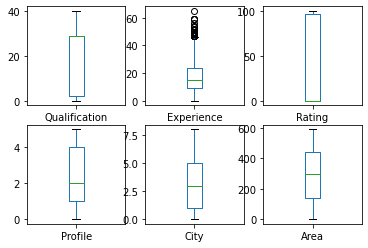

In [70]:
# Checking Outliers
df_test.plot.box(subplots=True,layout=(2,3))

In [71]:
# removing outliers

from scipy.stats import zscore

z=np.abs(zscore(df_test))
print(df_test.shape)
df_test=df_test.loc[(z<3).all(axis=1)]
print(df_test.shape)

(1987, 6)
(1976, 6)


In [72]:
df_test.skew()

Qualification   -0.176337
Experience       0.873380
Rating           0.227271
Profile          0.031856
City             0.026217
Area             0.041570
dtype: float64

In [73]:
#df_test['Experience']=np.sqrt(df_test['Experience'])

In [74]:
for col in df_test.columns:
    if df_test.skew().loc[col]>0.55:
        df_test[col]=np.log1p(df_test[col])

In [75]:
df_test.skew()

Qualification   -0.176337
Experience      -0.994683
Rating           0.227271
Profile          0.031856
City             0.026217
Area             0.041570
dtype: float64

# Predicting the Fees

In [76]:
df_test['Fees']=rfr.predict(df_test)

In [77]:
df_test['Fees']

0       1276.073300
1       1276.073300
2       992.557563 
3       351.177114 
4       764.251099 
           ...     
1982    774.639391 
1983    883.587173 
1984    1091.720465
1985    764.251099 
1986    917.856784 
Name: Fees, Length: 1976, dtype: float64

In [78]:
df_test['Fees'].value_counts()

1276.073300    333
1065.370967    281
763.472558     141
1066.149508    132
1189.989278    110
              ... 
689.651127     1  
571.630074     1  
941.880359     1  
463.588905     1  
892.108767     1  
Name: Fees, Length: 154, dtype: int64

In [79]:
df_test['Fees'].max()

1276.0732995295944

In [80]:
df_test['Fees'].min()

230.3870223859524